## 1. Ebola, hurricanes, and forest fires, oh my
<p>Have you ever wondered who keeps an eye on your favorite restaurants to make sure your food is safe? Or removes old tires filled with standing water that could attract mosquitos? In the US, these tasks are among the services provided by over 2,500 local health departments serving all communities across the country. In addition to basic services that keep us safe on a daily basis, local health departments also prepare for and respond to large-scale national, regional, and local emergencies.</p>
<p>Health department size and service provision vary widely depending on the needs and size of its constituent population, which can range from a few hundred to a few million people. Every few years, the National Association of County and City Health Officials (NACCHO) surveys health departments about their resources and the services they provide to constituents. </p>
<p>In 2016, the survey asked each health department to identify five health departments they connected to the most. Connections among health departments facilitate information sharing and coordination of services and are especially important during public health emergencies. The Ebola outbreak in 2014, Hurricane Harvey in 2017, and the California wildfires in 2018 are examples of national, regional, and state emergencies requiring coordination of public health services.</p>
<p>To understand the partnerships underlying the public health response to emergencies, let's examine the network of local health departments and identify key health departments and gaps in the network at the national, regional, and state levels.  </p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_438/img/doh-pic.jpg" alt="City of St. Louis Department of Health"></p>

In [2]:
# load the libraries
library(readr)
library(dplyr)
library(igraph)
library(ggraph)

# Import the edgelist from the naccho2016clean.csv file
health.dep.edges <- read_csv(file = "datasets/naccho2016clean.csv")
head(health.dep.edges)

# Import the attributes from the naccho2016att.csv file
health.dep.nodes <- read_csv(file = "datasets/naccho2016att.csv")
head(health.dep.nodes)

# Merge the edgelist and attributes into a network object
health.dep.net <- graph_from_data_frame(d = health.dep.edges, 
                      vertices = health.dep.nodes, 
                      directed = FALSE)

# Show the network object
health.dep.net


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'igraph'

The following objects are masked from 'package:dplyr':

    %>%, as_data_frame, groups, union

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union

Loading required package: ggplot2
Parsed with column specification:
cols(
  from = col_character(),
  to = col_character()
)


from,to
AK001,OR024
AK101,AK001
AL038,AL050
AL038,KY032
AL038,AL080
AL038,TN020


Parsed with column specification:
cols(
  nacchoid = col_character(),
  tobacco = col_double(),
  nutrition = col_double(),
  state = col_character(),
  type = col_character(),
  rurality = col_character(),
  population = col_double(),
  leader.tenure = col_double(),
  fte = col_double()
)


nacchoid,tobacco,nutrition,state,type,rurality,population,leader.tenure,fte
AK001,0,1,AK,county,urban,301010,1.6043806,156.0
AK101,0,1,AK,multi-county,rural,418302,1.8316221,187.5
AL004,1,1,AL,county,rural,22506,NA,NA
AL015,1,1,AL,county,rural,15080,5.8316221,10.0
AL038,1,1,AL,county,urban,660793,4.4982886,NA
AL042,0,1,AL,county,urban,154255,0.7364818,NA


IGRAPH UN-B 2058 5818 -- 
+ attr: name (v/c), tobacco (v/n), nutrition (v/n), state (v/c), type
| (v/c), rurality (v/c), population (v/n), leader.tenure (v/n), fte
| (v/n)
+ edges (vertex names):
 [1] AK001--OR024 AK001--AK101 AL038--AL050 AL038--KY032 AL038--AL080
 [6] AL038--TN020 AL038--AL066 AR004--MO048 AR004--OK072 AR005--AR008
[11] AR005--AR044 AR005--AR050 AR005--AR063 AR002--AR006 AR006--AR009
[16] AR006--AR021 AR006--AR022 AR006--AR039 AR007--AR020 AR007--AR051
[21] AR005--AR008 AR008--AR043 AR008--AR071 AR008--AR057 AR002--AR009
[26] AR009--AR021 AR009--AR022 AR009--AR058 AR006--AR009 AR010--AR014
+ ... omitted several edges

## 2. Cleaning up the network object
<p>With more than 2,500 health departments in the US, the national network of partnerships may be large and complex. The first step in any analysis is to clean up the data. The health department network shows partnerships, which would logically be represented by a single link between any two health departments that partner. Local health departments do not typically partner with themselves, so there would be no loops in the network.</p>

In [4]:
# check for loops and multiples
is_simple(health.dep.net)

# remove loops and multiples
health.dep.net <- simplify(health.dep.net, 
                       remove.multiple = T, 
                       remove.loops = T)
health.dep.net
# check for loops and multiples again
is_simple(health.dep.net)

[1] FALSE

IGRAPH UN-B 2058 4979 -- 
+ attr: name (v/c), tobacco (v/n), nutrition (v/n), state (v/c), type
| (v/c), rurality (v/c), population (v/n), leader.tenure (v/n), fte
| (v/n)
+ edges (vertex names):
 [1] AK001--AK101 AK001--OR024 AL004--GA132 AL015--AR033 AL038--AL050
 [6] AL038--AL066 AL038--AL080 AL038--KY032 AL038--TN020 AL042--TN041
[11] AR002--AR006 AR002--AR009 AR002--AR013 AR002--AR021 AR002--AR022
[16] AR003--AR015 AR003--AR063 AR004--AR071 AR004--MO048 AR004--OK072
[21] AR005--AR008 AR005--AR044 AR005--AR050 AR005--AR063 AR006--AR009
[26] AR006--AR013 AR006--AR021 AR006--AR022 AR006--AR039 AR007--AR020
+ ... omitted several edges

[1] TRUE

## 3. Getting to know the network
<p>After cleaning up the network object, the next step is some exploratory analysis to get to know the network. </p>

In [6]:
# count the number of vertices in the network
num.health.dep <- vcount(graph = health.dep.net)

# count the number of edges in the network
num.connections <- ecount(graph = health.dep.net)

# compute network density 
net.density <- edge_density(graph = health.dep.net, loops = FALSE)

## 4. Connections facilitating coordination nationwide
<p>In 2014-2016 there was an outbreak of Ebola in West Africa. In late 2014, a case of Ebola was identified in Texas and health departments nationwide worked to prepare for the potential of a widespread outbreak. While this potential was never realized (there were just 4 cases eventually diagnosed in the US), it isn't difficult to imagine a large-scale infectious disease outbreak that requires coordination across the country to protect the uninfected and treat the infected. </p>
<p>Central network members can facilitate or control the spread of information and other resources and are often considered key or important network members. There are several different types of centrality. Two of the more commonly used are degree centrality and betweenness centrality. Degree centrality is a count of the number of connections a node has. Betweenness centrality quantifies the extent to which a node lies in the shortest path between any two other nodes in the network, often playing a bridging role.</p>
<p>The nodes with the highest degree and betweenness centrality may be key to spreading information and coordinating efforts nationwide. Nodes that have both high degree and high betweenness may be especially important.</p>

In [8]:
# identify highly connected nodes using degree
health.dep.nodes$health.dep.degree <- degree(health.dep.net)
arrange(health.dep.nodes, -health.dep.degree)

# identify bridges nodes using betweenness
health.dep.nodes$health.dep.between <- betweenness(health.dep.net)
arrange(health.dep.nodes, -health.dep.between)

nacchoid,tobacco,nutrition,state,type,rurality,population,leader.tenure,fte,health.dep.degree
KY009,1,1,KY,county,rural,35758,10.4449005,55.00,24
NC060,1,1,NC,county,urban,140420,4.4161534,98.40,22
KY021,1,1,KY,county,urban,50815,3.6605065,27.00,21
OK014,1,1,OK,county,urban,269908,2.6365504,105.00,21
OH066,1,0,OH,county,rural,63180,10.3764543,24.00,19
OH092,0,1,OH,city,rural,175914,3.7672827,70.50,19
TX144,1,1,TX,county,urban,2020286,NA,472.00,19
WI068,1,1,WI,county,urban,43437,18.0369606,NA,19
IL011,NA,NA,IL,county,rural,13520,24.5284061,44.00,18
MO049,0,0,MO,city,rural,470800,17.6016426,158.00,18


nacchoid,tobacco,nutrition,state,type,rurality,population,leader.tenure,fte,health.dep.degree,health.dep.between
WA022,1,1,WA,county,urban,2079967,1.6372348,1244.00,17,669781.78
MA043,1,1,MA,city,urban,109694,8.9965773,47.00,15,316283.61
MO049,0,0,MO,city,rural,470800,17.6016426,158.00,18,301857.56
TX144,1,1,TX,county,urban,2020286,NA,472.00,19,287214.88
IN053,1,1,IN,county,urban,934243,21.2457218,NA,15,263147.78
KY047,1,1,KY,multi-county,rural,44542,11.8138266,60.00,13,260935.16
MO102,1,1,MO,county,urban,1001876,1.1608487,501.00,13,211836.38
CA045,1,1,CA,county,urban,9502247,1.5797399,3740.00,12,165662.72
WI062,1,1,WI,county,rural,35563,4.1095142,21.00,9,165177.71
IA069,1,1,IA,county,urban,217751,3.9698837,50.30,13,163217.25


## 5. Connections for regional coordination
<p>Some disasters are more regional than national and would not require all health departments across the country to be involved. For example, in 2017, Hurricane Harvey poured between 10 and 50 inches of rain in a short period of time across parts of southeastern Texas and southwestern Louisiana. This resulted in widespread flooding across the region and tested the emergency preparedness of health departments and others. Let's use network methods to identify key players and gaps in the network across Texas and Louisiana that might suggest new connections to prepare for future events.</p>

In [10]:
# subset the network so it includes TX, LA 
region.net <- induced_subgraph(graph = health.dep.net, 
                   vids = which(V(health.dep.net)$state %in% c('LA', 'TX')))

# Find the number of vertices (i.e., network size) using vcount()
vcount(region.net)

# Use edge_density() to find the density of region.net
edge_density(region.net)

# plot the network with theme_graph
lhd.net.theme <- ggraph(graph = region.net, layout = "with_kk") +
  geom_edge_link() +
  geom_node_point(aes(color = state)) +
  theme_graph()

[1] 47

[1] 0.09713228

## 6. Which health departments are central in Texas and Louisiana?
<p>While collaboration between the states will be challenging with no existing connections, the health departments in each state are well connected to each other. We can use degree centrality and betweenness centrality to find the key health departments in each state should another disaster occur. </p>

In [12]:
# identify important nodes in each state using degree
region.net$degree <- degree(region.net)

# get the top degree health depts for each state
top.degree.LA <- head(sort(region.net$degree[V(region.net)$state == "LA"], 
                             decreasing = T))

top.degree.TX <- head(sort(region.net$degree[V(region.net)$state == "TX"], 
                             decreasing = T))

# identify important nodes in each state using betweenness
region.net$between <- betweenness(region.net)

# get the top betweenness health depts for each state
top.bet.LA <- head(sort(region.net$between[V(region.net)$state == "LA"], 
                          decreasing = TRUE))
top.bet.TX <- head(sort(region.net$between[V(region.net)$state == "TX"], 
                          decreasing = TRUE))

## 7. Visualizing the central health departments
<p>We just found several central health departments that were either highly connected (degree centrality) or were forming bridges between other health departments (betweenness centrality). Visualize these central health departments to get a better idea of their importance and place in the network.</p>

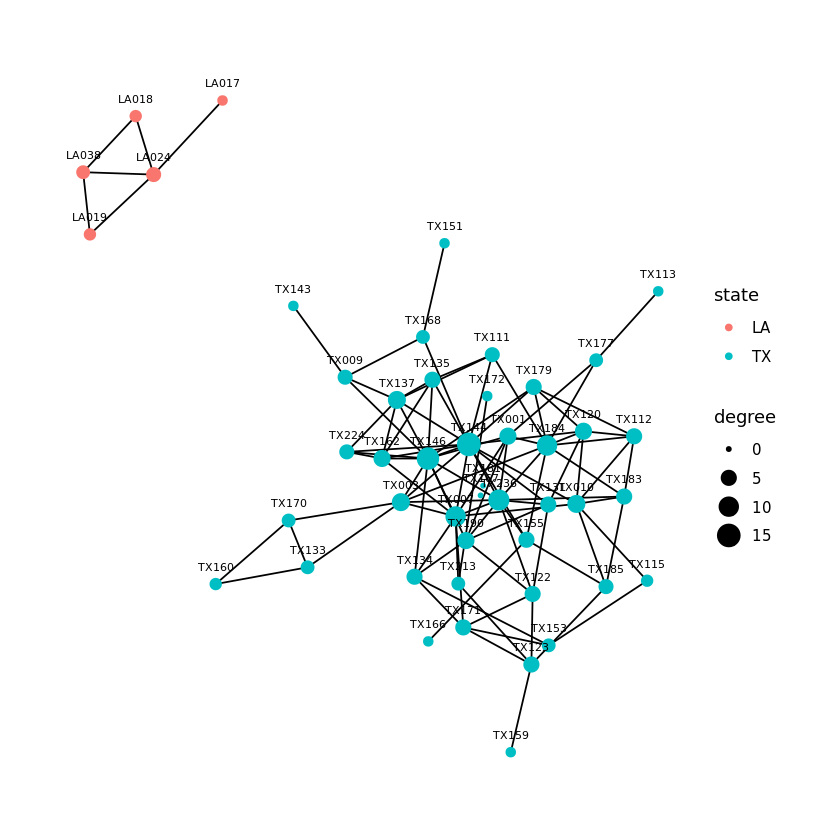

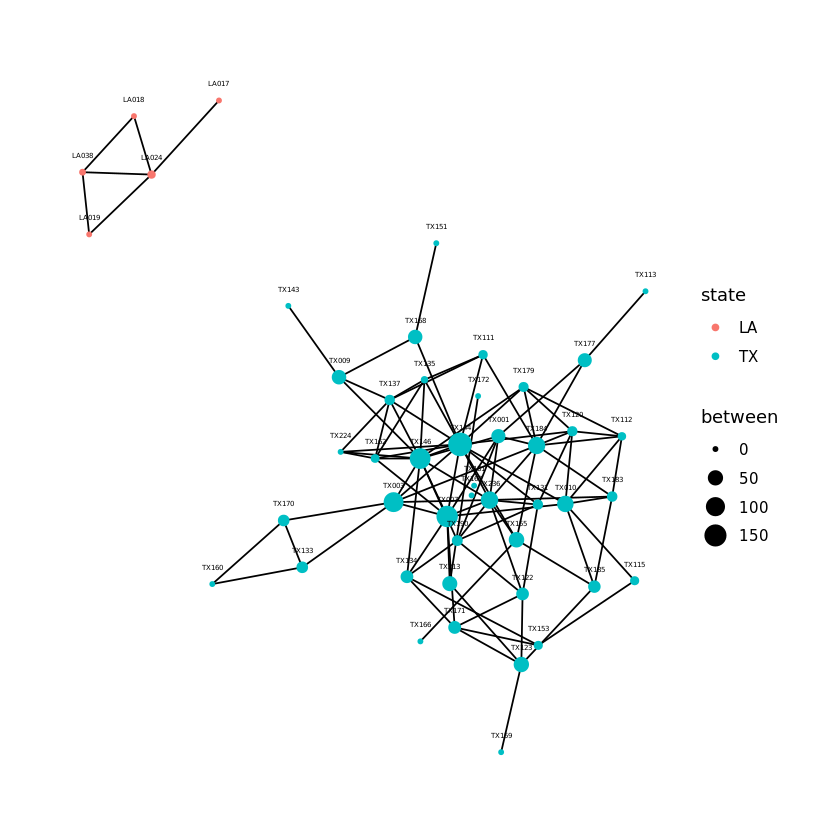

In [14]:
# add degree to the node attributes
V(region.net)$degree <- degree(region.net)

# plot with node size by degree, color by state, theme graph, Kamada Kawai layout
region.plot.degree <- ggraph(graph = region.net, layout = "with_kk") +
  geom_edge_link() +
  geom_node_point(aes(colour = state, size = degree)) +
  geom_node_text(aes(label = name, size = 1), nudge_y = .25) +
  theme_graph()
region.plot.degree

# add betweenness to the node attributes
V(region.net)$between <- betweenness(region.net)

# plot with node size by betweenness, color by state, theme graph, Kamada Kawai layout
region.plot.between <- ggraph(graph = region.net, layout = "with_kk") +
  geom_edge_link() +
  geom_node_point(aes(colour = state, size = between)) +
  geom_node_text(aes(label = name, size = 1), nudge_y = .25) +
  theme_graph()
region.plot.between

## 8. What about state-level networks during emergencies?
<p>There are national and regional emergencies like Ebola and Hurricane Harvey. There are also state and local emergencies like the wildfires in California in 2018. We can understand the network and its key players using the same approaches but with a single state network.</p>

In [16]:
# subset the network so it includes only CA
cali.net <- induced_subgraph(graph = health.dep.net, 
                 vids = which(V(health.dep.net)$state %in% "CA"))

# Find the number of vertices (i.e., network size) using vcount()
vcount(cali.net)

# Use edge_density() to find the density 
edge_density(cali.net)

# Find and sort degree centrality for each health department
top.cali.degree <- head(sort(degree(cali.net), decreasing = TRUE))

# Find and sort betweenness centrality for each health department
top.cali.between <- head(sort(betweenness(cali.net), decreasing = TRUE))

cali.net

[1] 36

[1] 0.1063492

IGRAPH UN-B 36 67 -- 
+ attr: name (v/c), tobacco (v/n), nutrition (v/n), state (v/c), type
| (v/c), rurality (v/c), population (v/n), leader.tenure (v/n), fte
| (v/n)
+ edges (vertex names):
 [1] CA004--CA040 CA005--CA019 CA005--CA031 CA005--CA048 CA010--CA031
 [6] CA010--CA034 CA010--CA045 CA010--CA048 CA011--CA022 CA011--CA026
[11] CA011--CA038 CA011--CA042 CA011--CA053 CA011--CA058 CA013--CA022
[16] CA013--CA032 CA013--CA042 CA013--CA048 CA013--CA052 CA019--CA048
[21] CA019--CA049 CA020--CA033 CA020--CA045 CA020--CA060 CA022--CA026
[26] CA022--CA042 CA022--CA053 CA025--CA052 CA026--CA038 CA026--CA042
+ ... omitted several edges

## 9. Are central health departments urban?
<p>In addition to the <code>state</code> attribute, the network object includes several other health department characteristics that may be useful in understanding what makes two health departments partner with each other. One of the characteristics is <code>rurality</code>, which classifies each health department as rural or urban. Two other characteristics are <code>fte</code>, or full-time employees, and <code>leader.tenure</code>, which measures the years the leader has been at the health department.</p>
<p>Urban health departments are likely to be in more populated areas and to serve more people. It would make sense that urban health departments are more central to the network since they have more resources to use in forming and maintaining partnerships. However, rural health departments might have more incentive to partner to fill gaps in service provision. Having more full-time employees and stable leadership could also influence the ability of health departments to partner. </p>

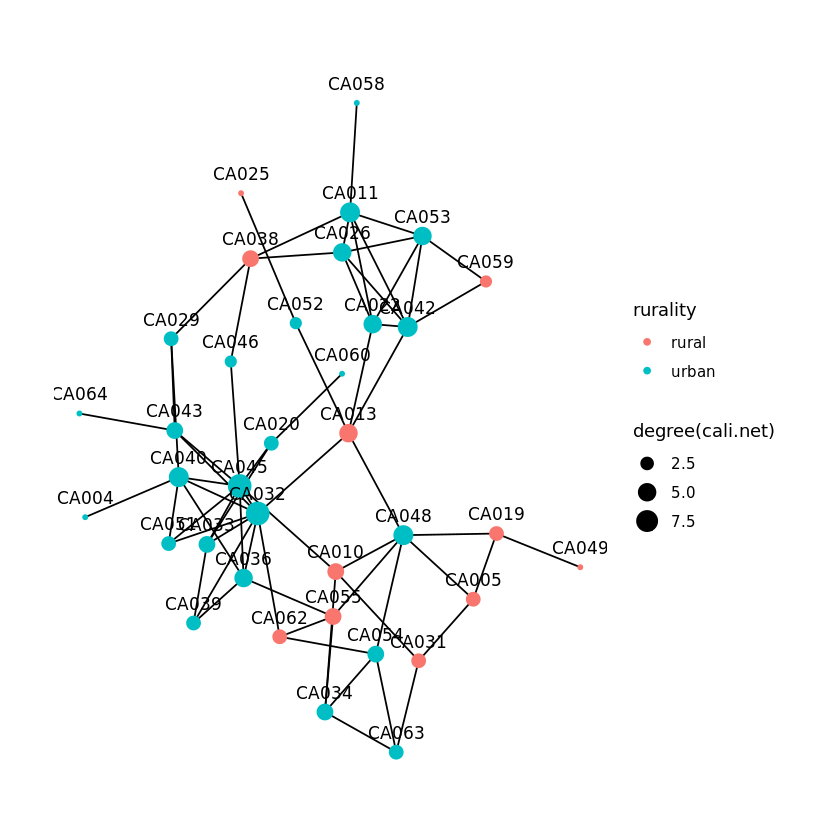

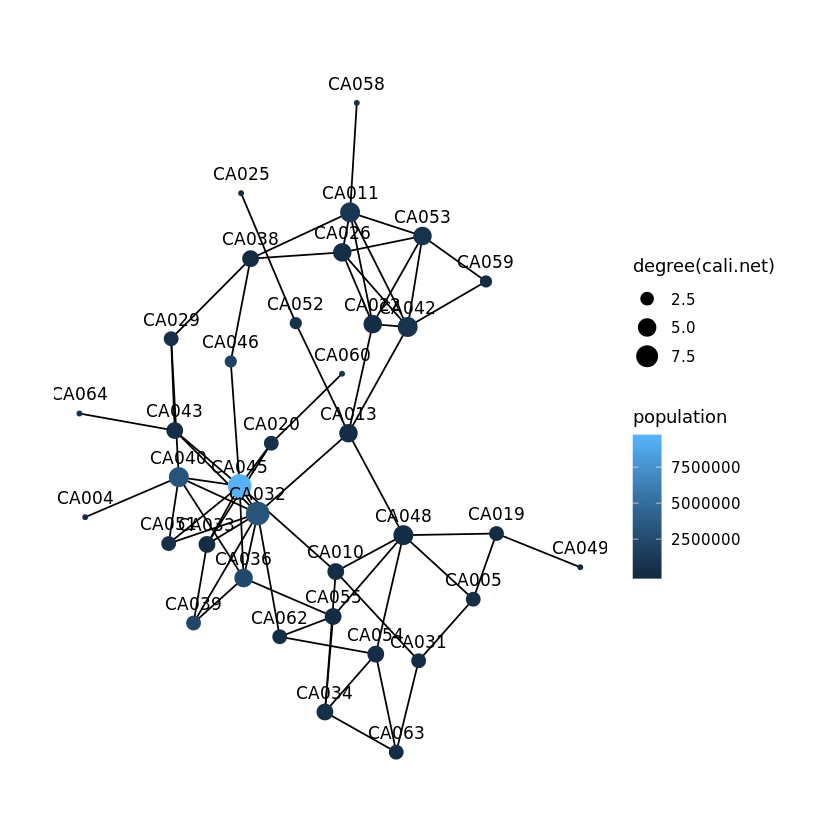

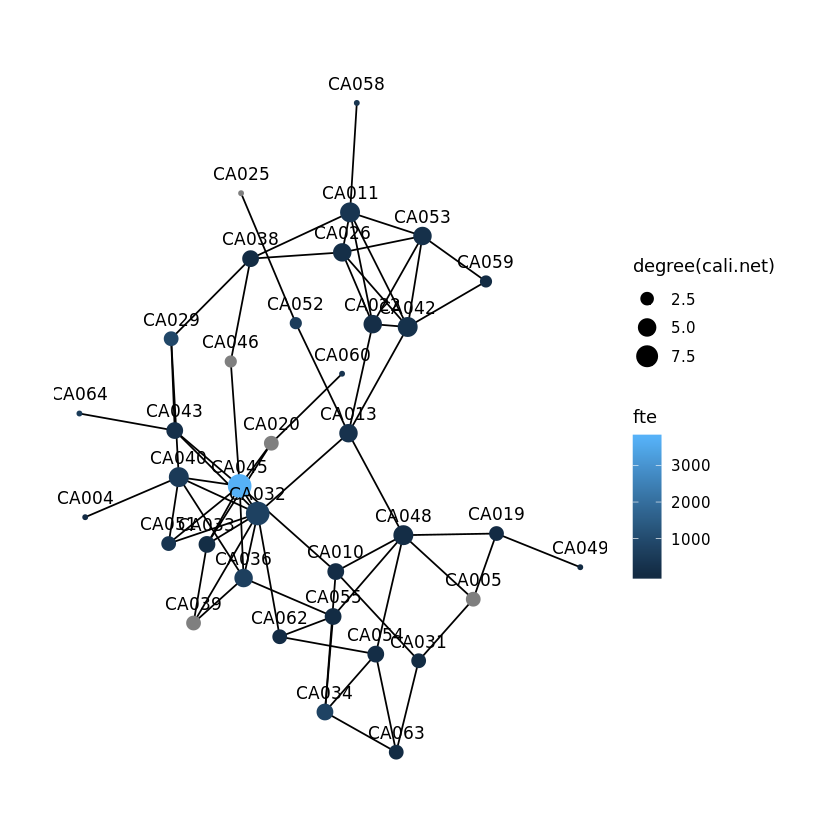

In [18]:
# Fill in the `colour` parameter with the rurality attribute 
# and the `size` parameter with degree to visualize rurality in cali.net
cali.net.rural.deg <- ggraph(graph = cali.net, layout = "with_kk") +
  geom_edge_link() +
  geom_node_point(aes(colour = rurality, size = degree(cali.net))) +
  geom_node_text(aes(label = name, size = 3), nudge_y = .2) +
  theme_graph()
cali.net.rural.deg

# Fill in the `colour` parameter with the population attribute 
# and the `size` parameter with degree to visualize population in cali.net
cali.net.pop.deg <- ggraph(graph = cali.net, layout = "with_kk") +
  geom_edge_link() +
  geom_node_point(aes(colour = population, size = degree(cali.net))) +
  geom_node_text(aes(label = name, size = 3), nudge_y = .2) +
  theme_graph()
cali.net.pop.deg

# Fill in the `colour` parameter with the fte attribute and 
# the `size` parameter with degree to visualize fte in cali.net
cali.net.fte.deg <- ggraph(graph = cali.net, layout = "with_kk") +
  geom_edge_link() +
  geom_node_point(aes(colour = fte, size = degree(cali.net))) +
  geom_node_text(aes(label = name, size = 3), nudge_y = .2) +
  theme_graph()
cali.net.fte.deg

## 10. Which health departments have high betweenness?
<p>Local health departments nationwide coordinate to provide services needed on a daily basis and to respond to local, regional, and national emergencies. An examination of betweenness and degree centrality identified a Texas health department (TX144) and a Missouri health department (MO049) that had both high degree and high betweenness. These health departments may be very useful in coordinating national public health efforts. </p>
<p>The regional network across Louisiana and Texas was disconnected, suggesting an opportunity to form new ties to improve coordination efforts for the future. Urban health departments in Texas had higher degree and betweenness and would be key players in coordination in Texas. Only urban health departments were in the Louisiana network, which may indicate poor survey response by rural health departments, which often have extremely limited resources.</p>
<p>The most central node by betweenness in the California state network was a rural health department (CA013), while two urban health departments (CA045, CA032) were the most connected. A statewide effort might rely on these three health departments to disseminate information and coordinate efforts across this large state. </p>
<p>By measuring and visualizing the network of health departments, we can get a better idea of strengths, key players, and gaps in governmental public health. Health departments can use this information to purposefully build their networks and to take advantage of the current natural leaders to protect us all from peril. </p>
<p><img src="https://s3.amazonaws.com/assets.datacamp.com/production/project_438/img/county-doh-pic.jpg" alt="County Department of Health"></p>

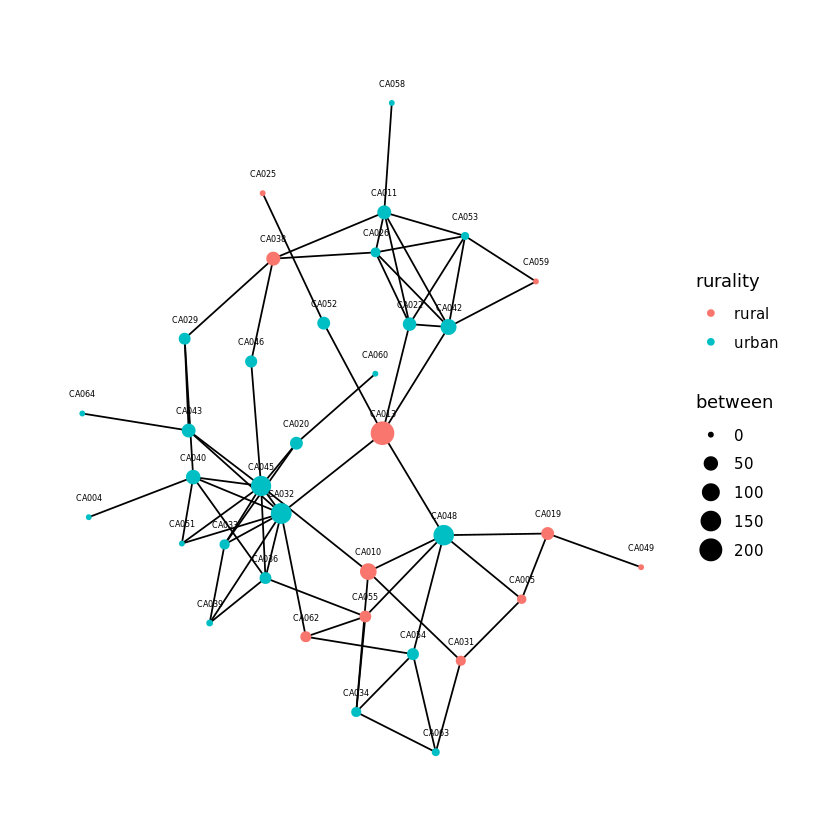

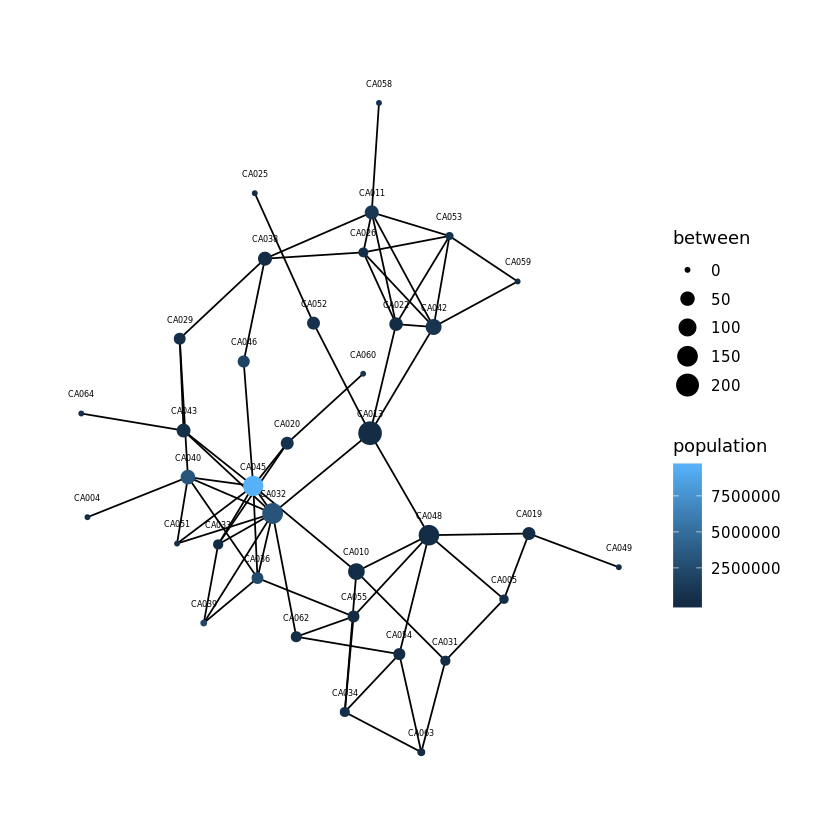

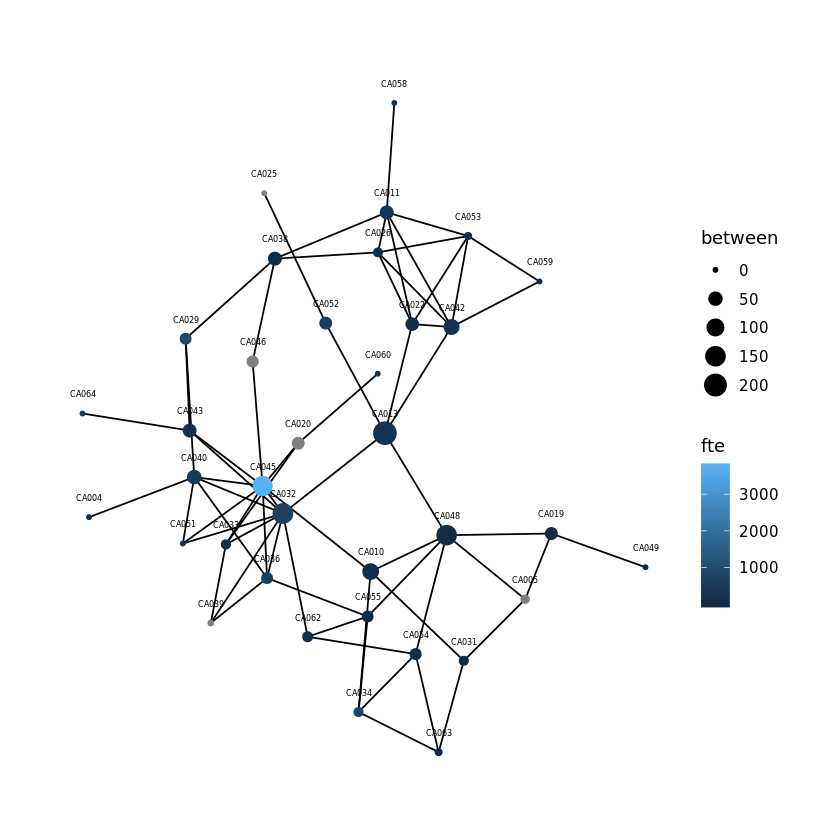

In [20]:
# compute betweenness for both networks
V(region.net)$between <- betweenness(region.net)
V(cali.net)$between <- betweenness(cali.net)

# cali.net with rurality color nodes sized by betweenness
cali.net.rural.bet <- ggraph(graph = cali.net, layout = "with_kk") +
  geom_edge_link() +
  geom_node_point(aes(colour = rurality, size = between)) +
  geom_node_text(aes(label = name, size = 3), nudge_y = .2) +
  theme_graph()
cali.net.rural.bet

# cali.net with population color nodes sized by betweenness
cali.net.pop.bet <- ggraph(graph = cali.net, layout = "with_kk") +
  geom_edge_link() +
  geom_node_point(aes(colour = population, size = between)) +
  geom_node_text(aes(label = name, size = 3), nudge_y = .2) +
  theme_graph()
cali.net.pop.bet

# cali.net with fte color nodes sized by betweenness
cali.net.fte.bet <- ggraph(graph = cali.net, layout = "with_kk") +
  geom_edge_link() +
  geom_node_point(aes(colour = fte, size = between)) +
  geom_node_text(aes(label = name, size = 3), nudge_y = .2) +
  theme_graph()
cali.net.fte.bet